In [1]:
import spinWannier
from spinWannier.WannierTBmodel import WannierTBmodel

In [2]:
    # directories
model_folder='CrSTe_minimal'

sc_dir=f'{model_folder}/0_self-consistent'
nsc_dir=f'{model_folder}/1_non-self-consistent'
wann_dir=f'{model_folder}/2_wannier'
bands_dir=f'{model_folder}/1_band_structure'
tb_model_dir=f'{model_folder}/2_wannier/tb_model_wann90'

spn_file_extension = 'spn'
spn_formatted = False

data_saving_format = 'pickle' #'parquet' #


# Create a WannierTBmodel object, load the model
model = WannierTBmodel(sc_dir=sc_dir, nsc_dir=nsc_dir, wann_dir=wann_dir, bands_dir=bands_dir, tb_model_dir=tb_model_dir, \
                       data_saving_format=data_saving_format, \
                       spn_file_extension=spn_file_extension, spn_formatted=spn_formatted)

Wannier model constructed!


## 1D spin-colored band structure

In [3]:
kpoint_matrix = [
                [(0.333333,  0.333333,  0.000000),    (0.00,  0.00,  0.00)],
                [(0.00,  0.00,  0.00),    (0.50, 0.00,  0.00)],
                [(0.50, 0.00,  0.00),    (0.333333,  0.333333,  0.000000)]
                ]

The file bands_spin_11.pickle already exists in f'CrSTe_minimal/2_wannier/tb_model_wann90/'.
Skipping the calculation, loading the data instead!



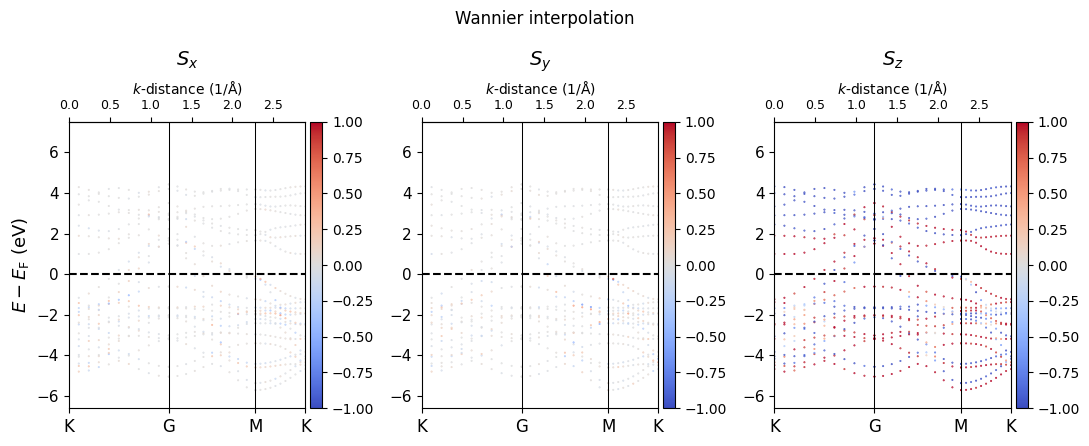

In [4]:
kpath_ticks = ['K', 'G', 'M', 'K']
Nk = 11
fout_1D = f'bands_spin_{Nk}'
savefig = True
showfig = True

model.interpolate_bands_and_spin(kpoint_matrix, kpath_ticks=kpath_ticks, kmesh_2D=False, kmesh_density=Nk, \
                                 kmesh_2D_limits=[-0.5, 0.5], save_bands_spin_texture=True, fout=fout_1D)
model.plot1D_bands(fout='spin_texture_1D_home_made.jpg', yaxis_lim=[-6.6, 7.5], savefig=savefig, showfig=showfig)


# 2D spin textures

The file bands_spin_2D_41x41.pickle already exists in f'CrSTe_minimal/2_wannier/tb_model_wann90/'.
Skipping the calculation, loading the data instead!

average Sz 0.47971109800238937


C:\Users\lv268562\Documents\PhD work\Scripts\spinWannier\src\spinWannier\wannier_utils.py:1881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["closest_anchor"] = df_temp["phi"].apply(
C:\Users\lv268562\Documents\PhD work\Scripts\spinWannier\src\spinWannier\wannier_utils.py:1887: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.loc[:, "anchor_difference"] = (
C:\Users\lv268562\Documents\PhD work\Scripts\spinWannier\src\spinWannier\wannier_utils.py:1881: SettingWithCopyWarning: 
A value is trying

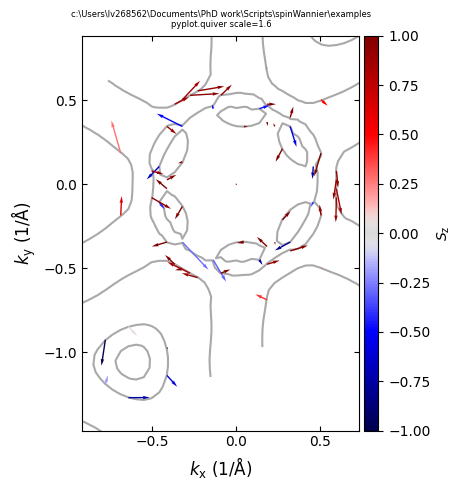

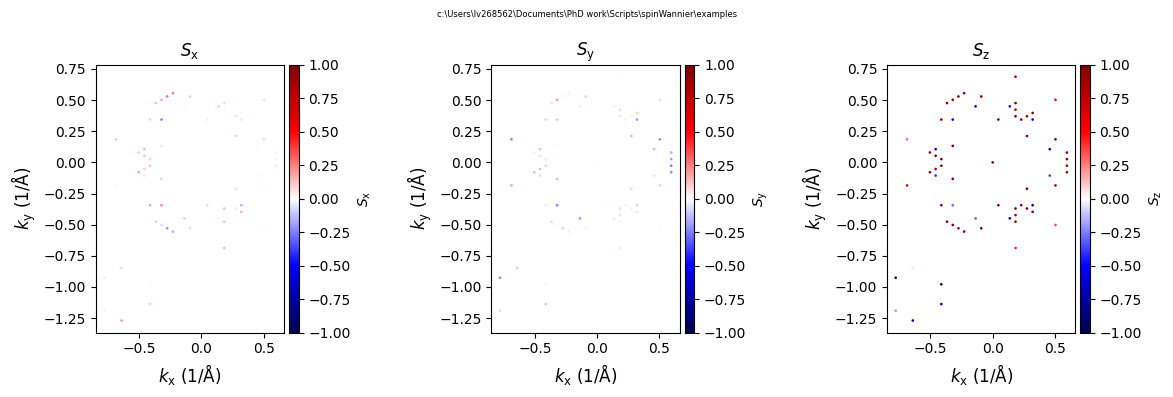

In [5]:
Nk2D = 41
data_2D_fname = f'bands_spin_2D_{Nk2D}x{Nk2D}'
savefig = True
showfig = True

model.interpolate_bands_and_spin(kpoint_matrix, kmesh_2D=True, kmesh_density=Nk2D, kmesh_2D_limits=[-0.5, 0.5], \
                                   save_bands_spin_texture=True, fout=data_2D_fname, )

model.plot2D_spin_texture(fin_2D=data_2D_fname, fin_1D=fout_1D, fig_name="spin_texture_2D_home_made.jpg", savefig=savefig, showfig=showfig)

## Wannier quality

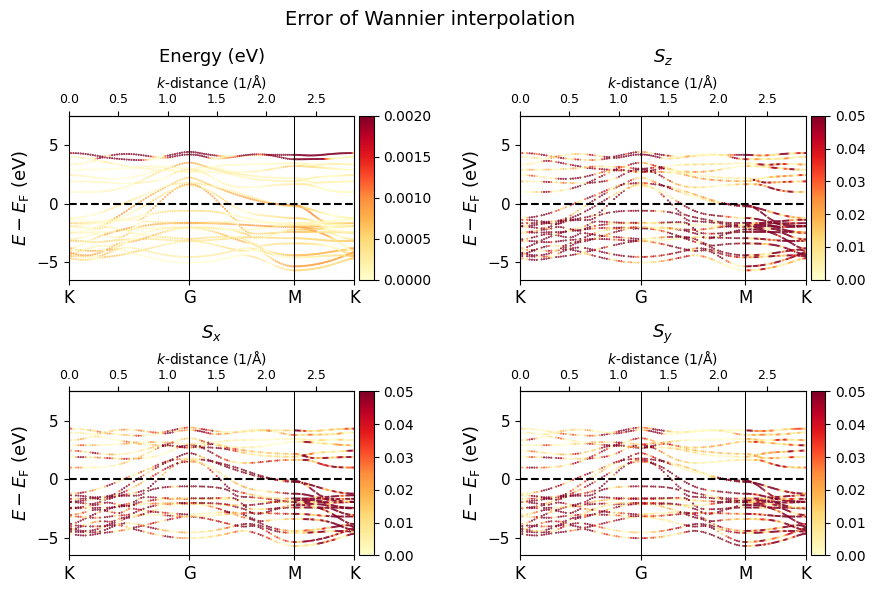

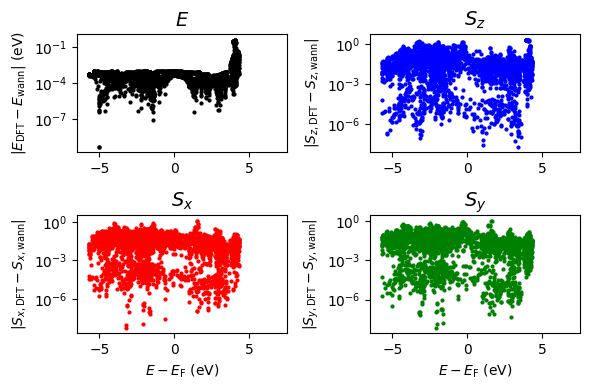

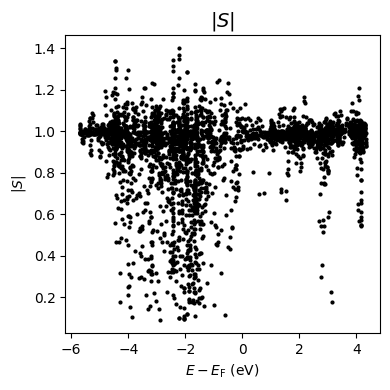

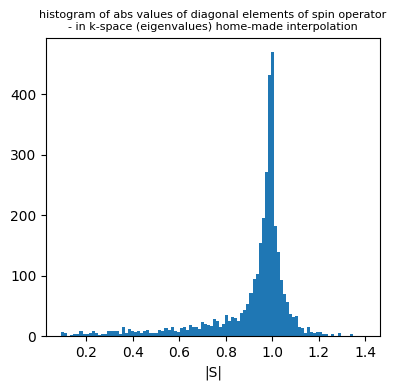

In [6]:
yaxis_lim = [-6.5, 7.5]
savefig = True
showfig = True

model.wannier_quality(yaxis_lim=yaxis_lim, savefig=savefig, showfig=showfig)